# Decision Tree Exercise with Wine Dataset

In [10]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
from subprocess import call
import pydotplus
from sklearn.preprocessing import LabelEncoder

## Step 1 - Load data

In [11]:
raw_data = read_csv('wine.csv')
raw_data.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_OD280_OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
class_labels = raw_data['class'].unique()
class_labels

array([1, 2, 3])

In [13]:
feature_columns = raw_data.drop('class', axis=1).columns
label_columns = ['class']
print('feature columns:' + str(feature_columns) + '\n')
print(' label columns:' + str(label_columns))

feature columns:Index([u' alcohol', u' malic_acid', u' ash', u' alcalinity_of_ash',
       u' magnesium', u' total_phenols', u' flavanoids',
       u' nonflavanoid_phenols', u' proanthocyanins', u' \tcolor_intensity',
       u' hue', u' diluted_OD280_OD315', u' proline'],
      dtype='object')

 label columns:['class']


## Step 2 - Split data in train and test

In [14]:
x = raw_data.filter(feature_columns).apply(LabelEncoder().fit_transform).as_matrix()
y = raw_data.filter(label_columns).as_matrix()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state = 100)

## Step 3 - Train decision tree

In [15]:
wine_decision_tree = DecisionTreeClassifier().fit(x_train, y_train)

## Step 4 - Test decision tree

In [16]:
y_pred = wine_decision_tree.predict(x_test)
'Decision tree accuracy is ' + str(accuracy_score(y_test, y_pred))

'Decision tree accuracy is 0.907407407407'

## Step 5 - Plot the decision tree

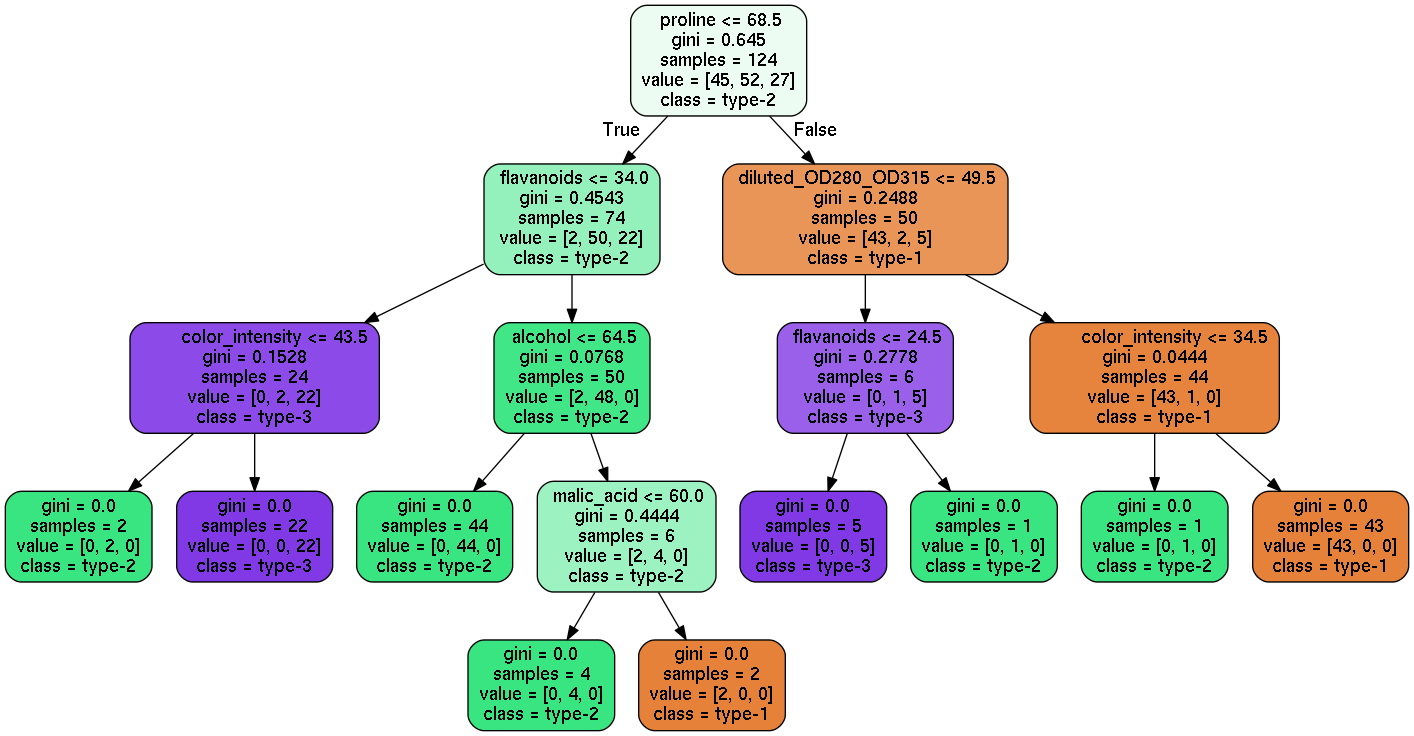

In [17]:
dot_data = export_graphviz(wine_decision_tree, 
                    out_file=None,
                    feature_names=feature_columns,
                    class_names=['type-1','type-2','type-3'],  # [1, 2, 3]
                    filled=True, 
                    rounded=True,
                    special_characters = False)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Attributes importance

In [18]:
attr_importance = DataFrame()
attr_importance['feature']    = feature_columns
attr_importance['importance'] = wine_decision_tree.feature_importances_
attr_importance.sort_values('importance', ascending=False)

,feature,importance
12,proline,0.424114
6,flavanoids,0.347340
11,diluted_OD280_OD315,0.110257
9,\tcolor_intensity,0.070279
1,malic_acid,0.033340
0,alcohol,0.014670
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000


## Simplified decision tree

In [20]:
simplified_decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=5).fit(x_train, y_train)
y_pred_2 = simplified_decision_tree.predict(x_test)
'Simplified decision tree accuracy is ' + str(accuracy_score(y_test, y_pred_2))

'Simplified decision tree accuracy is 0.814814814815'

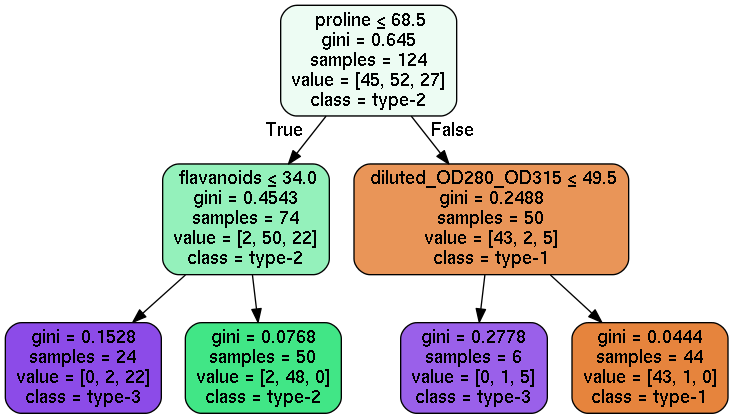

In [22]:
dot_data = export_graphviz(simplified_decision_tree, out_file=None, 
                    feature_names=feature_columns,  
                    class_names=['type-1','type-2','type-3'],  # [1, 2, 3]  
                    filled=True, rounded=True,  
                    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())